# Distribution, Association Rule Mining

### Import liabaries


In [1]:
import pandas as pd
from pandas.io.json._normalize import json_normalize
import json 


#### Load JSON Sample File
*   Create data frame
*   Display some data 

In [2]:
with open('test_10_nft_details.json') as f:
    data = json.load(f)
    
# Create a DataFrame from the JSON data

df = json_normalize(
    data['nfts'],
    meta=['token_id', ['rarity', 'rank']],
    record_path='traits',
    meta_prefix='nft_'
)

# Display the DataFrame
print(df)

          type                 value display nft_token_id nft_rarity.rank
0   Background                  Gray    None         3589            6016
1        Mouth                  Grin    None         3589            6016
2         Eyes                    3d    None         3589            6016
3      Clothes          Bayc T Black    None         3589            6016
4          Fur                 Brown    None         3589            6016
5      Earring           Silver Stud    None         3589            6016
6   Background                Orange    None         3131            9982
7         Eyes                Sleepy    None         3131            9982
8          Fur            Dark Brown    None         3131            9982
9        Mouth        Bored Unshaven    None         3131            9982
10     Earring           Silver Hoop    None         9974            1012
11  Background            Aquamarine    None         9974            1012
12         Fur            Dark Brown  

### Rarity summary

In [3]:
df['nft_rarity.rank'].describe()


count       59
unique      10
top       1012
freq         7
Name: nft_rarity.rank, dtype: int64

#### Test Results: Rarities are unique 

### Now Move Forward to the whole dataset

In [4]:
with open('full_nft_details.json') as f:
    full_data = json.load(f)
    
# Create a DataFrame from the JSON data

F_NFT = json_normalize(
    full_data['nfts'],
    meta=['token_id', ['rarity', 'rank']],
    record_path='traits',
    meta_prefix='nft_'
)
# Rarity rank and token id summary
print(F_NFT['nft_rarity.rank'].describe())
print(F_NFT['nft_token_id'].describe())


count     58824
unique     9996
top        4625
freq         12
Name: nft_rarity.rank, dtype: int64
count     58824
unique     9998
top        1653
freq          7
Name: nft_token_id, dtype: object


# Base Data Frame

##### Creator/ owner information

In [5]:
NFT = json_normalize(full_data['nfts'])

In [6]:
# Number of unique trait types for all NFTs
unique_trait_types = set()
for traits_list in NFT['traits']:
	for trait in traits_list:
		unique_trait_types.add(trait['type'])

print(f"Number of unique trait types: {len(unique_trait_types)}")

# Count of unique trait values by type
trait_value_counts = {}
for traits_list in NFT['traits']:
	for trait in traits_list:
		trait_type = trait['type']
		trait_value = trait['value']
		if trait_type not in trait_value_counts:
			trait_value_counts[trait_type] = set()
		trait_value_counts[trait_type].add(trait_value)

print("\nUnique values count per trait type:")
for trait_type, values in sorted(trait_value_counts.items()):
	print(f"{trait_type}: {len(values)} unique values")
 
# Total unique trait counts 
total_unique_traits = sum(len(values) for values in trait_value_counts.values())
print(f"\nTotal unique traits across all types: {total_unique_traits}")

Number of unique trait types: 7

Unique values count per trait type:
Background: 8 unique values
Clothes: 43 unique values
Earring: 6 unique values
Eyes: 23 unique values
Fur: 19 unique values
Hat: 36 unique values
Mouth: 33 unique values

Total unique traits across all types: 168


##### Creator info
* Not much information, 9997 are from one creator, and the thing is masked or hashed

In [7]:
# Creator distribution 

creator_stats = NFT['creator'].value_counts().reset_index()
creator_stats.columns = ['creator', 'nft_count']

print("Creator Distribution")
print(creator_stats.head(20))

Creator Distribution
                                      creator  nft_count
0  0xaba7161a7fb69c88e16ed9f455ce62b791ee4d03       9997
1  0xa858ddc0445d8131dac4d1de01f834ffcba52ef1          1


##### Owner Info
*   pretty spread out and some people own large amount
    - next step would be check the rarity ranks of those people who own lots of NFTs
    - The transaction event data will come in later in the research

In [24]:
owners = json_normalize(full_data['nfts'],
                        record_path=['owners'],
                        meta=['token_id'],
                        meta_prefix='nft_')

# Record the populate wallet addresses
# Make sure have the time for the transaction data as well. Make sure we know who is the first person to influnce the price. Who boosted the price



top_owners = owners['address'].value_counts().head(10)
print("Top 10 Owners")
print(top_owners)

print ("------------------------------------")

# Record NFT holding distributions 
holdings_dist = owners.groupby('nft_token_id')['address'].unique()
print("NFT Holdings Distribution")
print(holdings_dist.value_counts().head(10))

# average holdings per address
avg_holdings_per_address = owners.groupby('address')['nft_token_id'].count().mean()
print(f"Average Holdings per Address: {avg_holdings_per_address:.2f}")

Top 10 Owners
address
0xaaa2da255df9ee74c7075bcb6d81f97940908a5d    396
0xe2a83b15fc300d8457eb9e176f98d92a8ff40a49    234
0x29469395eaf6f95920e59f858042f0e28d98a20b    233
0xf395767ae0e947504651a33ac2899520c551955d    157
0x440bcc7a1cf465eafabae301d1d7739cbfe09dda    107
0x98e711f31e49c2e50c1a290b6f2b1e493e43ea76    106
0x00000000b3daca9d0452fd19b121e6484def1140    105
0x758b54320f984a8cabf833f969e7c721c5c12141     90
0x7285e8f0186a0a41e73cef7603ad7b80a2d5a793     82
0xe3199072644455d19f58b1fd8106ac80b3d2e780     76
Name: count, dtype: int64
------------------------------------
NFT Holdings Distribution
address
[0xaaa2da255df9ee74c7075bcb6d81f97940908a5d]    396
[0xe2a83b15fc300d8457eb9e176f98d92a8ff40a49]    234
[0x29469395eaf6f95920e59f858042f0e28d98a20b]    233
[0xf395767ae0e947504651a33ac2899520c551955d]    157
[0x440bcc7a1cf465eafabae301d1d7739cbfe09dda]    107
[0x98e711f31e49c2e50c1a290b6f2b1e493e43ea76]    106
[0x00000000b3daca9d0452fd19b121e6484def1140]    105
[0x758b54320f984a

# Traits
*   Frequencies 
*   Table for features

In [9]:
# traits matrix 
traits_df = json_normalize(full_data['nfts'],
                           record_path=['traits'],
                           meta=['token_id',['rarity','rank']],
                           meta_prefix='nft_')

# traits frequency

traits_freq = traits_df.groupby(['type','value']).size().reset_index(name='count')
traits_freq = traits_freq.sort_values(by='count', ascending=False)
print("\n most comment traits combination Top10:")
print(traits_freq.head(50))

# Bored maynot have a huge pricing impact. Any feature that is more rare that is likely to attract more pricing. 
# Time matters. people start seeing one rare feature and start duplicate
# It is not about the look (avoid),ownership is important 



 most comment traits combination Top10:
           type                     value  count
135       Mouth                     Bored   2272
62         Eyes                     Bored   1714
144       Mouth            Bored Unshaven   1550
82          Fur                     Brown   1369
85          Fur                Dark Brown   1352
6    Background                    Purple   1290
7    Background                    Yellow   1282
5    Background                    Orange   1273
0    Background                Aquamarine   1266
1    Background                Army Green   1243
2    Background                      Blue   1242
4    Background             New Punk Blue   1232
80          Fur                     Black   1229
3    Background                      Gray   1170
55      Earring               Silver Hoop    882
60         Eyes                 Bloodshot    846
56      Earring               Silver Stud    823
88          Fur              Golden Brown    778
75         Eyes             

### Traits Pivot Table & Combine rarity data
* first number is index which does not mean anything
* The next step would be try to explore more on the nubmer of features that are associated with each rarity rank
* Also should consider the relationship between the number of types that certain things are ranked with higher rarity

In [10]:
# traits pivot table 

trait_pivot = traits_df.pivot_table(index='nft_token_id',
                                    columns='type',
                                    values='value',
                                    aggfunc='first').reset_index()

# Combine rarity data 

trait_pivot = trait_pivot.merge(
    NFT[['token_id','rarity.rank']],
    left_on = 'nft_token_id',
    right_on = 'token_id'
)

# analyze the relationship between traits and rarity rank

eye_rarity = trait_pivot.groupby('Eyes')['rarity.rank'].mean().reset_index()
print("\n different eyes color average rarity rank:")
print(eye_rarity.sort_values(by='rarity.rank',ascending=False))

# Most expensive is Laser Eyes
# backward ranking 


 different eyes color average rarity rank:
           Eyes  rarity.rank
5         Bored  6425.037340
3     Bloodshot  5447.882979
18       Sleepy  5208.431425
8         Crazy  5152.000000
6        Closed  5115.061972
20    Wide Eyed  4998.652095
16          Sad  4905.270417
0            3d  4755.616016
11        Heart  4615.966921
1         Angry  4594.134259
15        Robot  4571.382857
7         Coins  4566.820459
22       Zombie  4491.246753
19   Sunglasses  4403.184659
17      Scumbag  4288.060345
10     Eyepatch  4284.747748
2     Blindfold  4202.151515
13   Hypnotized  3901.045455
21       X Eyes  3667.288066
12  Holographic  3428.304636
4    Blue Beams  3181.265306
9        Cyborg  2935.120370
14   Laser Eyes  2587.420290


# `Testing` What features are coming up together more frequently

1. consider Association Rule Mining 0/1 Matrix for pairs 
2. K-means clustering

In [11]:
# import packages

from mlxtend.preprocessing import TransactionEncoder # convert lists of transactions into a binary matrix format
from mlxtend.frequent_patterns import apriori #applies a classic association rule learning algorithm to find frequent itemsets


In [22]:
# Generate feature combination transaction list

trait_combinations = traits_df.groupby('nft_token_id').apply(
    lambda x: list(zip(x['type'], x['value']))
) # for every NFT group, match the type and value into a tuple then convert to a list 


# transform the transaction list into a binary matrixTe

te = TransactionEncoder() # create a transaction encoder object
te_ary = te.fit(trait_combinations).transform(trait_combinations) # this finds all unique traits and creates a binary matrix
trait_matrix = pd.DataFrame(te_ary, columns=te.columns_)


# Find the frequent itemsets with a minimum support of 0.01

frequent_itemsets = apriori(trait_matrix, min_support=0.01, use_colnames=True) # use_colnames=True will use the column names in the DataFrame, otherwise it will use column indices
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x)) # itemset is a set that indicate the number of combinations of traits | len(x) is the getting number of traits in the combination
print("\n frequent itemsets(min_support =0.001):")
print(frequent_itemsets.sort_values(by='support', ascending=False).head(10))


C:\Users\Micheli\AppData\Local\Temp\ipykernel_20164\1739095842.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trait_combinations = traits_df.groupby('nft_token_id').apply(



 frequent itemsets(min_support =0.001):
      support                    itemsets  length
122  0.227245            ((Mouth, Bored))       1
56   0.171434             ((Eyes, Bored))       1
127  0.155031   ((Mouth, Bored Unshaven))       1
75   0.136927              ((Fur, Brown))       1
78   0.135227         ((Fur, Dark Brown))       1
6    0.129026      ((Background, Purple))       1
7    0.128226      ((Background, Yellow))       1
5    0.127325      ((Background, Orange))       1
0    0.126625  ((Background, Aquamarine))       1
1    0.124325  ((Background, Army Green))       1


##### Sample binary Table
* Apriori Algorithm can find the association (Association Rule Mining)

| NFT | ('Mouth', 'Bored') | ('Hat', 'Cap') | ('Background', 'Yellow') | ('Mouth', 'Smile') | ('Hat', 'Beanie') | ('Eyes', 'Robot') | ('Fur', 'Dmt') |
|----|-----------------|-------------|------------------|---------------|--------------|--------------|-------------|
| 1  | 1               | 1           | 1                | 0             | 0            | 0            | 0           |
| 2  | 0               | 0           | 0                | 1             | 1            | 0            | 0           |
| 3  | 1               | 0           | 0                | 0             | 0            | 1            | 0           |
| 4  | 0               | 1           | 0                | 0             | 0            | 0            | 1           |


* Min_support represents certain traits pair's existence / total number of NFT items 

## **Support Calculation Formula**
The support of a trait combination is calculated as:

$$
\text{Support} = \frac{\text{Number of NFTs containing the trait combination}}{\text{Total number of NFTs}}
$$


---

## **Example Calculation**
Assume you have **10,000 NFTs**, and the following trait combinations appear:

| Trait Combination       | Occurrences | Support Calculation      | Support Value |
|------------------------|------------|--------------------------|--------------|
| (`Mouth`, `Bored`)    | 200        | 200/2000  | 0.02         |
| (`Hat`, `Cap`)        | 50         | 50/10000   | 0.005        |
| (`Eyes`, `Robot`)     | 100        | 100/10000 | 0.01         |

---

This table shows that:
- `Mouth = Bored` appears in **2% of all NFTs**.
- `Hat = Cap` is relatively rare, appearing in only **0.5% of NFTs**.
- `Eyes = Robot` appears in **1% of NFTs**, making it a **low-frequency trait combination**.

If we set **`min_support = 0.01`**, then:
- `Mouth = Bored` ✅ **Included** (0.02 >= 0.01)
- `Hat = Cap` ❌ **Excluded** (0.005 < 0.01)
- `Eyes = Robot` ✅ **Included** (0.01 >= 0.01)

This filtering ensures that **only frequent trait combinations are considered for further analysis**.


#### Continue on seeing what NFT traits pairs are common

In [13]:
frequent_itemsets[frequent_itemsets['length'] == 1].head(100)  # 1 trait combination

,support,itemsets,length
0,0.126625,"((Background, Aquamarine))",1
1,0.124325,"((Background, Army Green))",1
2,0.124225,"((Background, Blue))",1
3,0.117023,"((Background, Gray))",1
4,0.123225,"((Background, New Punk Blue))",1
...,...,...,...
95,0.057812,"((Hat, Beanie))",1
96,0.026205,"((Hat, Bowler))",1
97,0.019504,"((Hat, Bunny Ears))",1
98,0.030406,"((Hat, Commie Hat))",1


In [ ]:
# sort by highest support
frequent_itemsets[frequent_itemsets['length'] == 2].sort_values('support', ascending=False).head(100)  # 2 traits combination

,support,itemsets,length


In [12]:
frequent_itemsets[frequent_itemsets['length'] > 2]  # 3 or more traits combination

,support,itemsets,length


### Interpret: this mouth = Bored single trait appears in 22.72% of the NFTs, it is a very common trait. 
- length = 1, single trait combination, very common traits
- length = 2, double trait combination, meaning two traits appear together in the same NFTs frequently

# Visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

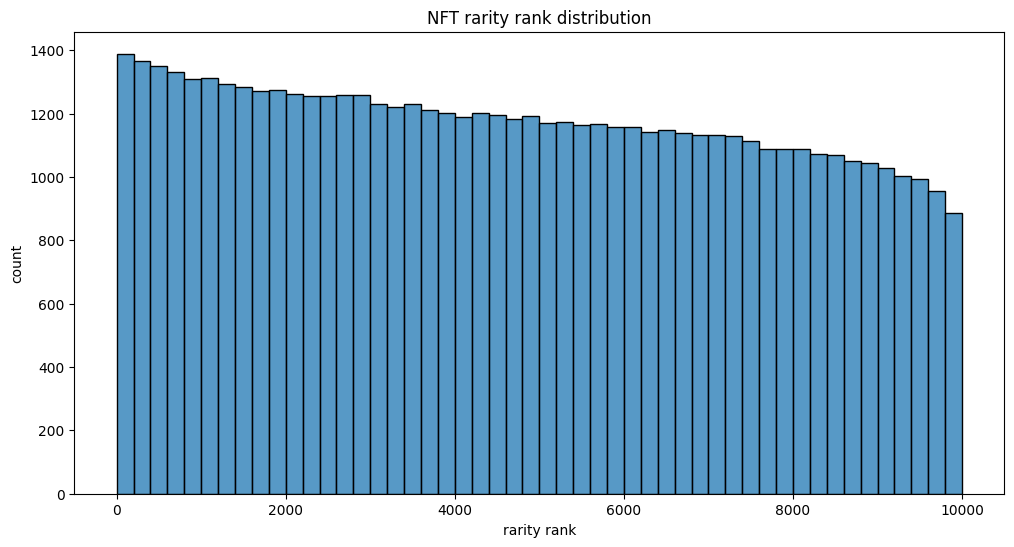

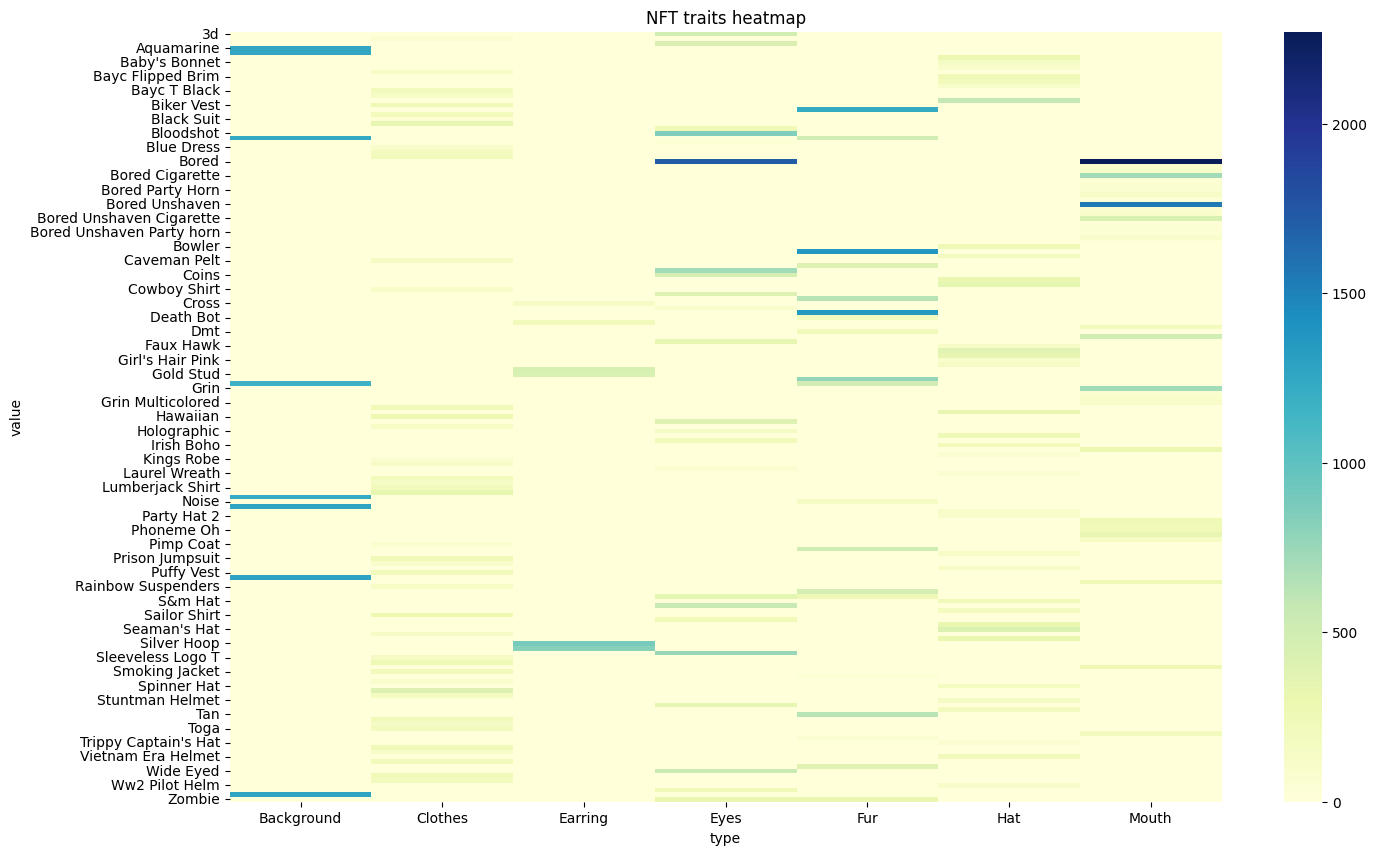

In [17]:
plt.figure(figsize=(12, 6))
# plot the distribution of rarity rank
sns.histplot(data=F_NFT, x ='nft_rarity.rank', bins=50)
plt.title('NFT rarity rank distribution')
plt.xlabel('rarity rank')
plt.ylabel('count')
plt.show()

# plot the heatmap of traits
trait_crosstab = pd.crosstab(traits_df['type'], traits_df['value'])
plt.figure(figsize=(16, 10))
sns.heatmap(trait_crosstab.T, cmap='YlGnBu')
plt.title('NFT traits heatmap')
plt.show()